In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
# 한글 폰트를 사용할 때 마이너스 부호가 깨져 보이는 문제에 대처한다.
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
data = np.random.randint(-100, 100, 50).cumsum() # -100 ~ 100 까지 50개, cumsum: 누적합계 구하기
data

array([  94,   55,   47,   23,  -49,   40,   69,  147,  100,   89,   43,
        124,   32,  -29,   -9,    1,   41,   10,  -26,  -35,  -60,  -76,
        -91,  -16, -105, -159,  -64,   21,  -35,  -94, -194, -249, -322,
       -254, -292, -226, -127, -111, -190, -211, -141, -132, -112,  -84,
       -115, -145, -238, -225, -275, -261], dtype=int32)

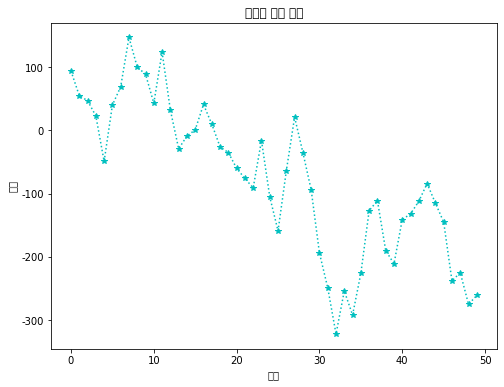

In [4]:
#plt.figure(figsize=(8, 6)) # 차트 크기 설정
plt.rcParams['figure.figsize'] = (8, 6)

plt.title('시간별 가격 추이') # 차트 제목
plt.xlabel('시간') # x축 제목
plt.ylabel('환률') # y축 제목

plt.plot(range(50), data, 'c*:')
plt.show()

폰트를 설정해 주기에 앞서 설치된 matplotlib 버전과 설치된 위치 정보를 확인한다.

In [5]:
print('matplotlib 버전: ', mpl.__version__)
print('matplotlib 설치 위치: ', mpl.__file__)
print('matplotlib 설정 정보 위치: ', mpl.get_configdir())
print('matplotlib 캐시 위치: ', mpl.get_cachedir())

matplotlib 버전:  3.3.4
matplotlib 설치 위치:  d:\k_digital\python\numpy\lib\site-packages\matplotlib\__init__.py
matplotlib 설정 정보 위치:  C:\Users\tjoeun-jr-906-07\.matplotlib
matplotlib 캐시 위치:  C:\Users\tjoeun-jr-906-07\.matplotlib


matplotlib의 설정 위치 정보를 알았으니 설정 파일의 위치를 확인한다.

In [6]:
print('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  d:\k_digital\python\numpy\lib\site-packages\matplotlib\mpl-data\matplotlibrc


컴퓨터에 설치된 폰트 목록을 얻어온다.

In [7]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10])

431
['C:\\WINDOWS\\Fonts\\phagspab.ttf', 'C:\\WINDOWS\\Fonts\\trebucit.ttf', 'C:\\WINDOWS\\Fonts\\times.ttf', 'C:\\WINDOWS\\Fonts\\Hancom Gothic Bold.ttf', 'C:\\WINDOWS\\Fonts\\trebuc.ttf', 'C:\\WINDOWS\\Fonts\\GARAIT.TTF', 'C:\\WINDOWS\\Fonts\\segoeuib.ttf', 'C:\\Windows\\Fonts\\H2SA1M.TTF', 'C:\\WINDOWS\\Fonts\\gulim.ttc', 'C:\\WINDOWS\\Fonts\\symbol.ttf']


In [8]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(f))
print(f[:10])

469
['DejaVu Serif', 'cmr10', 'DejaVu Serif', 'STIXSizeTwoSym', 'cmmi10', 'DejaVu Sans', 'STIXNonUnicode', 'STIXNonUnicode', 'DejaVu Serif', 'DejaVu Sans Mono']


나눔 글꼴을 사용할 것이므로 폰트 이름에 'Nanum'이 포함된 폰트만 가져온다.

In [9]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothicCoding', 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'),
 ('NanumGothicCoding', 'C:\\WINDOWS\\Fonts\\NanumGothicCoding-Bold.ttf'),
 ('NanumGothicCoding', 'C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf'),
 ('NanumGothicCoding', 'C:\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf')]

위에 코드릴 실행한 결과가 []만 나오거나 설치한 폰트가 보이지 않는다면 캐시 폴더로 이동해 모든 내용을 삭제한 후 다시 실행하면 설치된 폰트 목록이 정상작으로 보인다.

In [10]:
# mpl.font_manager.rebuild()

한글 폰트를 사용하도록 설정하는 방법은 3가지가 있다.

<1> FontProperties를 사용하는 방법 => 그래프에 폰트가 필요한 항목마다 지정해줘야 한다.

In [11]:
# 텍스트를 지정하는 항목에 지정해서 사용할 수 있고 지정해준 항목에만 해당 폰트가 적용된다.
# matplotlib.pyplot => title(), xlable(), ylabel(), legend(), text()
# matplotlib.axes => set_title()

font = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=font, size=15)

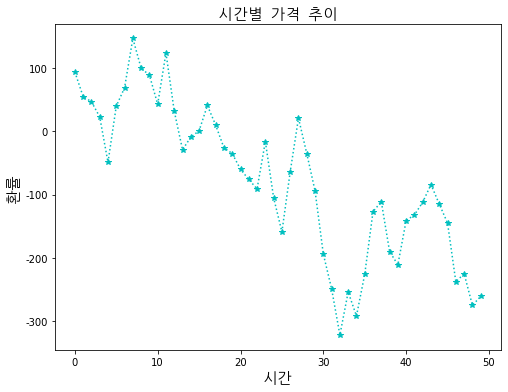

In [12]:
plt.figure(figsize=(8, 6))

plt.title('시간별 가격 추이', fontproperties=fontprop) # 차트 제목
plt.xlabel('시간', fontproperties=fontprop) # x축 제목
plt.ylabel('환률', fontproperties=fontprop) # y축 제목

plt.plot(range(50), data, 'c*:')
plt.show()

<2> matplotlib 라이브러리의 rcParams[]로 전역 글꼴 설정 => 그래프의 폰트가 파일마다 지정해줘야 한다.

In [13]:
# 기본 설정 읽기
print('기본으로 설정된 폰트 이름:',plt.rcParams['font.family'])
print('기본으로 설정된 폰트 크기:',plt.rcParams['font.size'])

기본으로 설정된 폰트 이름: ['sans-serif']
기본으로 설정된 폰트 크기: 10.0


In [14]:
# 2-1
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15

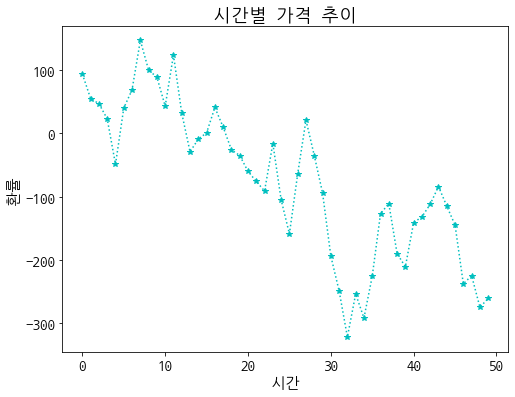

In [15]:
plt.figure(figsize=(8, 6))

plt.title('시간별 가격 추이')
plt.xlabel('시간')
plt.ylabel('환률')

plt.plot(range(50), data, 'c*:')
plt.show()

In [16]:
# 2-2
# rcParams 대신 FontProperties의 plt.rc를 사용하는 방법이 있다.
font = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=font).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothicCoding


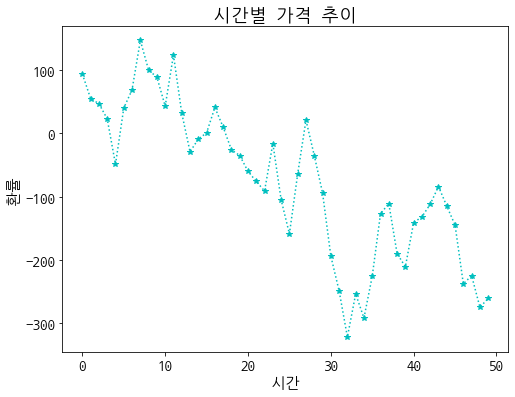

In [17]:
plt.figure(figsize=(8, 6))

plt.title('시간별 가격 추이')
plt.xlabel('시간')
plt.ylabel('환률')

plt.plot(range(50), data, 'c*:')
plt.show()

<3> 폰트 설정 정보를 matplotlib 설정 파일에 직접 넣어준다. => 그래프의 폰트가 필요한 컴퓨터마다 지정해줘야 한다.

In [18]:
# mpl.matplotlib_fname()를 실행하면 출력되는 경로의 파일을 수정한다.
# 이곳에 폰트를 지정하면 쥬피터 노트북을 실행할 때마다 바로 글꼴이 로드되도록 설정할 수 있다.
print(mpl.matplotlib_fname())
# font.family: sans-serif => NanumGothicCoding
#font.size: 10.0 => 15

d:\k_digital\python\numpy\lib\site-packages\matplotlib\mpl-data\matplotlibrc


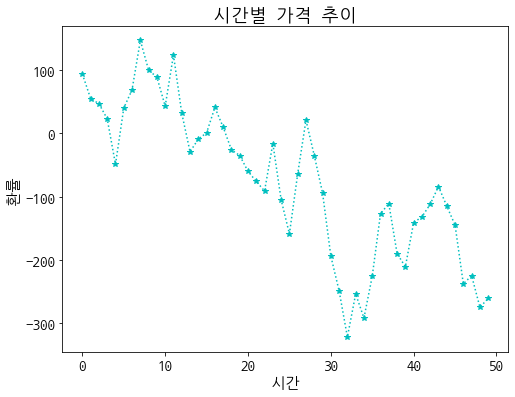

In [19]:
plt.figure(figsize=(8, 6))

plt.title('시간별 가격 추이')
plt.xlabel('시간')
plt.ylabel('환률')

plt.plot(range(50), data, 'c*:')
plt.show()